Z score for Outlier Detection

Z score is also called standard score.
This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.
More specifically, Z score tells how many standard deviations away a data point is from the mean.

Z score = (x - mean) / sd

In a normal distribution it is estimated that:
68% of the data points lie between +/- 1 standard deviation. 
95% of the data points lie between +/- 2 standard deviation. 
99.7% of the data points lie between +/- 3 standard deviation.
"https://media.geeksforgeeks.org/wp-content/uploads/20200428193707/image-111-1.png"

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier

1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2

Clearly, 15 is an outlier in this dataset.



In [3]:
import numpy as np 

In [5]:
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 2.6666666666666665
std. deviation is 3.3598941782277745


In [11]:
threshold = 3
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [15]


**Interquartile Range to Detect Outliers in Data**

Interquartile Range (IQR) is a technique that detects outliers by measuring the variability in a dataset.

IQR is used to measure variability by dividing a data set (sorted in ascending order) into quartiles.
Then we split it into 4 equal parts. The values Q1 (25th percentile), Q2 (50th percentile or median) and Q3 (75th percentile) separate dataset in 4 equal parts.
Q2 = median of the dataset.
Q1 = median of n smallest data points.
Q3 = median of n highest data points.

IQR = Q3−Q1
Data points that fall below Q1−1.5×IQR or above Q3+1.5×IQR are considered outliers.
6, 2, 1, 5, 4, 3, 50.
50 is clearly an outlier


In [38]:
import seaborn as sns

In [21]:
data = [6, 2, 3, 4, 5, 1, 50]
sort_data = np.sort(data)
sort_data

array([ 1,  2,  3,  4,  5,  6, 50])

In [27]:
Q1 = np.percentile(sort_data, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sort_data, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sort_data, 75, interpolation = 'midpoint') 

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1 
print('Interquartile range is', IQR)


Q1 25 percentile of the given data is,  2.5
Q1 50 percentile of the given data is,  4.0
Q1 75 percentile of the given data is,  5.5
Interquartile range is 3.0


In [29]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)


low_limit is -2.0
up_limit is 10.0


In [33]:
outlier =[]
for x in sort_data:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)


 outlier in the dataset is [50]


<Axes: >

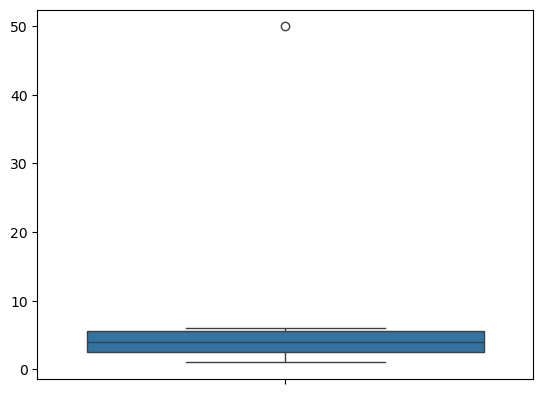

In [42]:
sns.boxplot(sort_data)